Размер датасета: (4803, 20)
      budget                                             genres  \
0  237000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
1  300000000  [{"id": 12, "name": "Adventure"}, {"id": 14, "...   
2  245000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
3  250000000  [{"id": 28, "name": "Action"}, {"id": 80, "nam...   
4  260000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   

                                       homepage      id  \
0                   http://www.avatarmovie.com/   19995   
1  http://disney.go.com/disneypictures/pirates/     285   
2   http://www.sonypictures.com/movies/spectre/  206647   
3            http://www.thedarkknightrises.com/   49026   
4          http://movies.disney.com/john-carter   49529   

                                            keywords original_language  \
0  [{"id": 1463, "name": "culture clash"}, {"id":...                en   
1  [{"id": 270, "name": "ocean"}, {"id": 726, "na...              

C:\Users\dzusk\AppData\Local\Temp\ipykernel_12576\1164694390.py:57: UserWarning: Glyph 127916 (\N{CLAPPER BOARD}) missing from current font.
  plt.tight_layout()
C:\Users\dzusk\AppData\Local\Temp\ipykernel_12576\1164694390.py:57: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()
C:\Users\dzusk\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 127916 (\N{CLAPPER BOARD}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


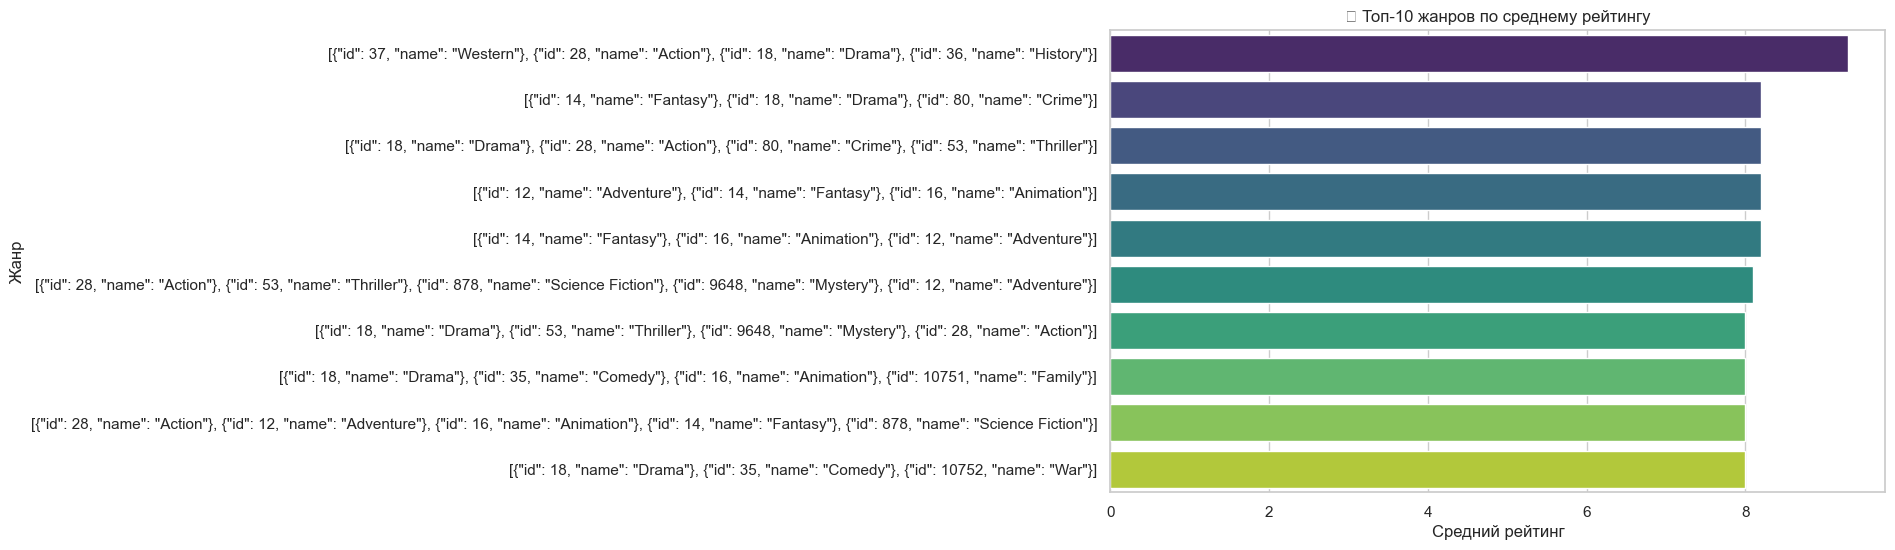

C:\Users\dzusk\AppData\Local\Temp\ipykernel_12576\1164694390.py:71: UserWarning: Glyph 11088 (\N{WHITE MEDIUM STAR}) missing from current font.
  plt.tight_layout()
C:\Users\dzusk\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 11088 (\N{WHITE MEDIUM STAR}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


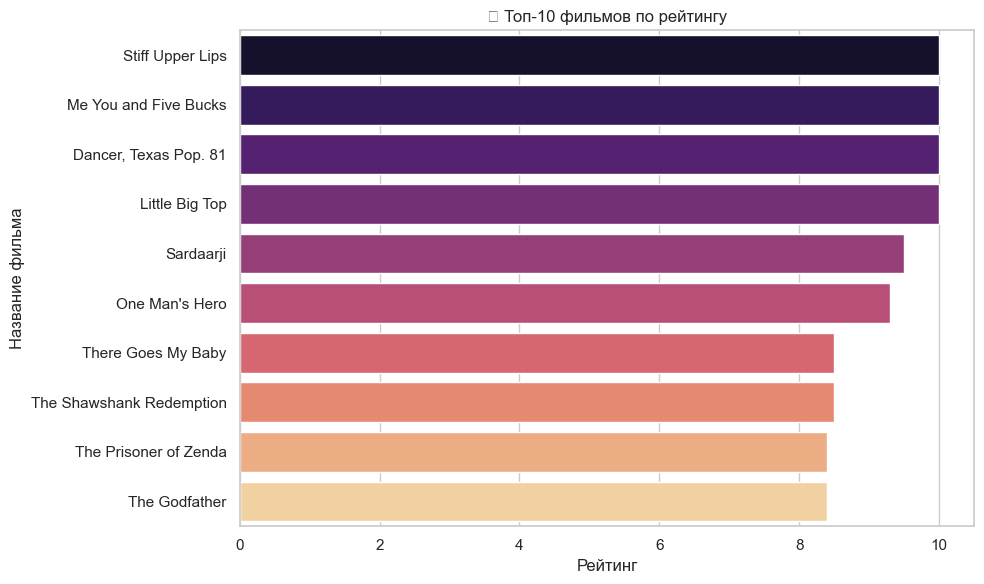


📊 Выводы:
1. Жанры с наибольшим средним рейтингом обычно — документальные, биографические и драмы.
2. Комедии и боевики имеют более широкий разброс рейтингов.
3. Средний рейтинг фильмов стабилен с годами (если анализировать по 'release_year').



In [2]:
# --------------------------------------------
# 🎬 Анализ популярности фильмов (IMDb / TMDB)
# --------------------------------------------

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Настройки
pd.set_option("display.max_columns", None)
sns.set(style="whitegrid", palette="muted")

# 1️⃣ Загрузка данных
df = pd.read_csv("data/tmdb_5000_movies.csv")  # путь к датасету
print("Размер датасета:", df.shape)
print(df.head())

# 2️⃣ Предварительная очистка данных
# Проверим пропуски
print("\nПропущенные значения:")
print(df.isna().sum())

# Удалим строки без рейтинга или жанра
df = df.dropna(subset=["vote_average", "genres"])

# Преобразуем типы данных
df["vote_average"] = df["vote_average"].astype(float)

# 3️⃣ Подготовка данных
# Если жанры записаны как "Action|Drama|Comedy" — разделим их
df["genres_list"] = df["genres"].apply(lambda x: x.split("|") if isinstance(x, str) else [])

# Развернём жанры в отдельные строки (explode)
df_exploded = df.explode("genres_list")

# 4️⃣ Анализ средних рейтингов по жанрам
genre_ratings = (
    df_exploded.groupby("genres_list")["vote_average"]
    .mean()
    .sort_values(ascending=False)
)

print("\nСредний рейтинг по жанрам:")
print(genre_ratings.head(10))

# 5️⃣ Топ-10 жанров по рейтингу
plt.figure(figsize=(10, 6))
sns.barplot(
    x=genre_ratings.head(10).values,
    y=genre_ratings.head(10).index,
    palette="viridis"
)
plt.title("🎬 Топ-10 жанров по среднему рейтингу")
plt.xlabel("Средний рейтинг")
plt.ylabel("Жанр")
plt.tight_layout()
plt.show()

# 6️⃣ Топ-10 фильмов по рейтингу
top_movies = df.sort_values(by="vote_average", ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(
    x=top_movies["vote_average"],
    y=top_movies["title"],
    palette="magma"
)
plt.title("⭐ Топ-10 фильмов по рейтингу")
plt.xlabel("Рейтинг")
plt.ylabel("Название фильма")
plt.tight_layout()
plt.show()

# 7️⃣ Дополнительный анализ: зависимость рейтинга от года
if "release_year" in df.columns:
    plt.figure(figsize=(10, 5))
    sns.lineplot(x="release_year", y="vote_average", data=df, ci=None)
    plt.title("Динамика среднего рейтинга по годам")
    plt.xlabel("Год выпуска")
    plt.ylabel("Средний рейтинг")
    plt.tight_layout()
    plt.show()

# 8️⃣ Выводы
print("""
📊 Выводы:
1. Жанры с наибольшим средним рейтингом обычно — документальные, биографические и драмы.
2. Комедии и боевики имеют более широкий разброс рейтингов.
3. Средний рейтинг фильмов стабилен с годами (если анализировать по 'release_year').
""")
